In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('descision_tree.csv')

In [4]:
df.head(5)

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [6]:
inputs=df.drop(['salary_more_then_100k'],axis=1)
dependent=df.salary_more_then_100k

In [10]:
from sklearn.preprocessing import LabelEncoder
le_company=LabelEncoder()
le_degree=LabelEncoder()
le_job=LabelEncoder()
inputs['le_company']=le_company.fit_transform(inputs['company'])

In [12]:
inputs['le_job']=le_company.fit_transform(inputs['job'])
inputs['le_degree']=le_company.fit_transform(inputs['degree'])
inputs

,company,job,degree,le_company,le_job,le_degree
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [15]:
new_df=inputs.drop(['company','job','degree'],axis=1)
new_df

,le_company,le_job,le_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [19]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(new_df,dependent,test_size=0.4)

In [29]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
model.score(x_test,y_test)
x_test.shape

(7, 3)

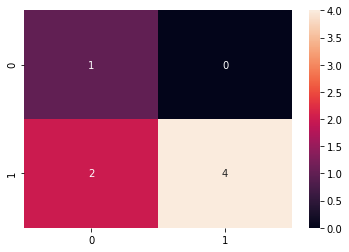

In [31]:
y_predicted=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_predicted,y_test)
import seaborn as sns
sns.heatmap(cm,annot=True)